# Cartão de Crédito - Fraudes - Kaggle

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings

warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
data = np.array(data)

In [21]:
previsores = data[:,1:-1]
previsores

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

# Escalonamento dos Dados

In [22]:
from sklearn.preprocessing import StandardScaler
previsores_scaler = StandardScaler()
previsores = previsores_scaler.fit_transform(previsores)
previsores

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31324853],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [23]:
classes = data[:,-1]
classes

array([0., 0., 0., ..., 0., 0., 0.])

# O KMeans: o gerador de Clusters

In [25]:
from sklearn.cluster import KMeans

In [62]:
wcss = []
for i in range(10,101,10):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(previsores)
    wcss.append(kmeans.inertia_)
wcss

[6406520.655433479,
 5293872.059424324,
 4628068.2526732385,
 4254212.606234284,
 3979406.144337348,
 3814534.417918084,
 3636111.1480494216,
 3515620.8628252083,
 3411675.7542937174,
 3309768.741074542]

In [96]:
wcss = pd.DataFrame(wcss, index=np.arange(10,101,10))

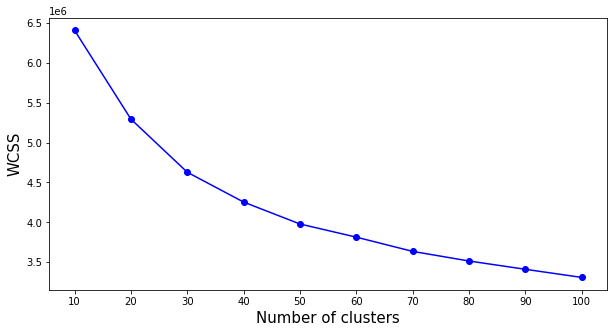

In [99]:
labels = np.arange(10,101,10)
plt.figure(figsize=(10,5))
plt.plot(wcss, '-bo')
plt.xlabel('Number of clusters',fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.xticks(labels)
plt.show()

In [29]:
k_means = KMeans(n_clusters=70, random_state=0)
k_means.fit(previsores)

KMeans(n_clusters=70, random_state=0)

In [46]:
rotulos = k_means.labels_
rotulos

array([ 9, 23, 38, ...,  7, 34,  9])

In [47]:
lista_clientes = np.column_stack((data, rotulos))
lista_clientes

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.49620000e+02,  0.00000000e+00,  9.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         2.69000000e+00,  0.00000000e+00,  2.30000000e+01],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
         3.78660000e+02,  0.00000000e+00,  3.80000000e+01],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         6.78800000e+01,  0.00000000e+00,  7.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.00000000e+01,  0.00000000e+00,  3.40000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         2.17000000e+02,  0.00000000e+00,  9.00000000e+00]])

In [48]:
lista_clientes = pd.DataFrame(lista_clientes)
lista_clientes

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,9.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,23.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,38.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,63.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0,65.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0,38.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0,7.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0,34.0


In [49]:
# Comparativo entre classes e clusters

X = lista_clientes[[0,30,31]]
X = X.set_index(0)
X = X.rename({30:'fraude',31:'cluster'},axis=1) 
X

,fraude,cluster
0,,
0.0,0.0,9.0
0.0,0.0,23.0
1.0,0.0,38.0
1.0,0.0,63.0
2.0,0.0,60.0
...,...,...
172786.0,0.0,65.0
172787.0,0.0,38.0
172788.0,0.0,7.0


# Obtendo os principais clusters com Outliers

In [50]:
import matplotlib.pyplot as plt

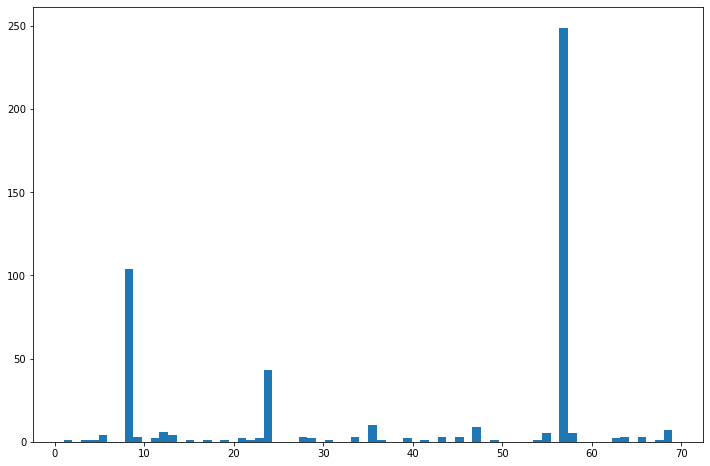

In [51]:
rcParams['figure.figsize'] = 12,8
fraudes1 = X[X['fraude']==1]
fraudes0 = X[X['fraude']==0]
n, b, patches = plt.hist(fraudes1['cluster'],bins=70)

In [52]:
bin_max = np.where(n == n.max())
bin_max

(array([57], dtype=int64),)

In [53]:
n = pd.DataFrame(n)
n[n[0]>10]

,0
7,104.0
23,43.0
57,249.0


In [54]:
n[n[0]>50].sum().values[0]

353.0

### O número de fraudes que eu teria conseguindo detectar é de 396 o que corresponde a quase 81%

In [55]:
print('O número de fraudes que eu teria conseguindo detectar é de', int(n[n[0]>10].sum().values[0]), 'o que corresponde a', int(n[n[0]>10].sum().values[0])/X['fraude'].sum())

O número de fraudes que eu teria conseguindo detectar é de 396 o que corresponde a 0.8048780487804879


In [56]:
X[(X['fraude']==0) & (X['cluster']==0)].size

13214

In [57]:
X[(X['fraude']==0) & (X['cluster']==30)].size

14928

In [58]:
X[(X['fraude']==0) & (X['cluster']==64)].size

3778

In [59]:
combativeis = X[(X['fraude']==0) & (X['cluster']==30)].size + X[(X['fraude']==0) & (X['cluster']==64)].size

### Entretanto, é preciso ponderar o bloqueio causador de Falso Positivo

In [60]:
print('Assim, seria possível bloquear compras nos clusters 30 e 64, de modo a se evitar o total de fraudes igual a', n[n[0]>50].sum().values[0], 'ou seja',(n[n[0]>50].sum().values[0]/X['fraude'].sum()),' das fraudes' )

Assim, seria possível bloquear compras nos clusters 30 e 64, de modo a se evitar o total de fraudes igual a 353.0 ou seja 0.717479674796748  das fraudes


### Mais de 71% das fraudes detectadas com antecedência, sem grande quantitativo de Falsos Positivos

In [61]:
print('E teria causado Falso Positivo em apenas', X[(X['fraude']==0) & (X['cluster']==30)].size + X[(X['fraude']==0) & (X['cluster']==64)].size, 'operações. Ou seja, apenas',(X[(X['fraude']==0) & (X['cluster']==30)].size + X[(X['fraude']==0) & (X['cluster']==64)].size)/X[X['fraude']==0].size)

E teria causado Falso Positivo em apenas 18706 operações. Ou seja, apenas 0.03289661115312242


#### Apenas 0,002% das operações com Falsos Positivos

# Aprendizado Supervisionado

- Random Forest
- Regressão Logística

##### Validação por meio de Stratified Cross Validation

# 1) Random Forest

Number of Estimators: 1 Accuracy: 0.9992275552122467
Number of Estimators: 6 Accuracy: 0.9996137776061234
Number of Estimators: 11 Accuracy: 0.9996137776061234
Number of Estimators: 16 Accuracy: 0.9996137776061234
Melhor n: 6  com acurácia: 0.9996137776061234


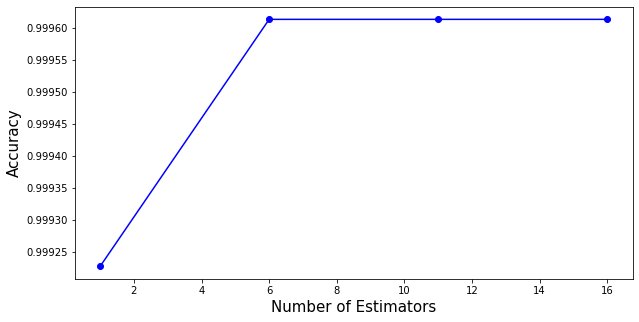

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(previsores, classes, test_size = p, random_state = 2)

vscore = []
vn = []
for n in range(1,20,5):
    model = RandomForestClassifier(n_estimators=n, criterion='entropy')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [101]:
# Random Forest com Validação cruzada Estratificada (Stratified CrossValidation )

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
Acurácia:  0.9995435553526912
Precisão: 0.953125
Recal: 0.7261904761904762
F1: 0.8243243243243243


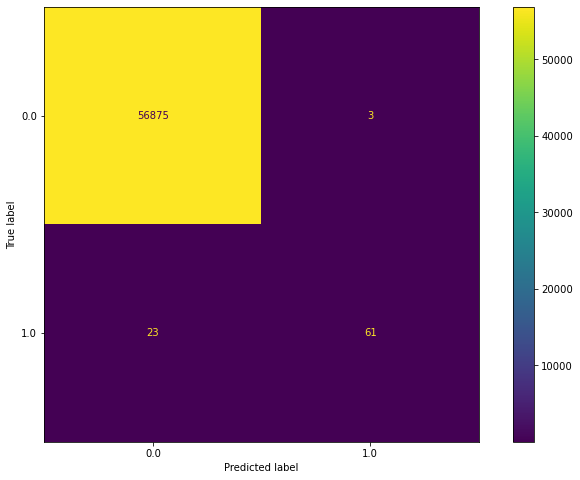

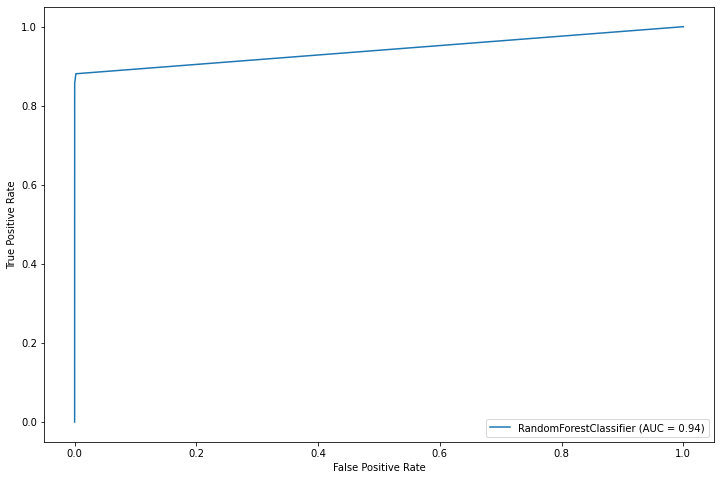

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
Acurácia:  0.9995786664794073
Precisão: 0.9545454545454546
Recal: 0.75
F1: 0.84


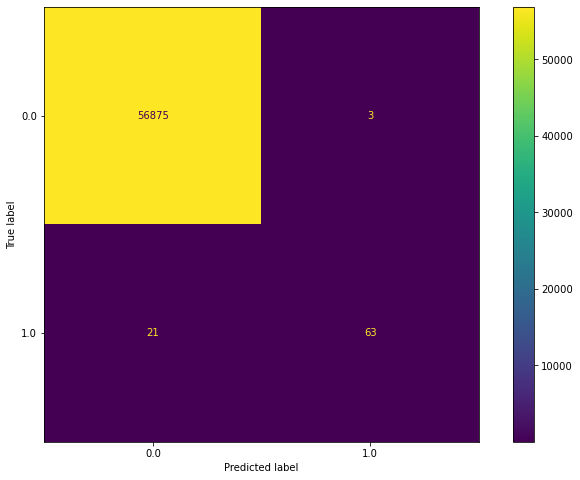

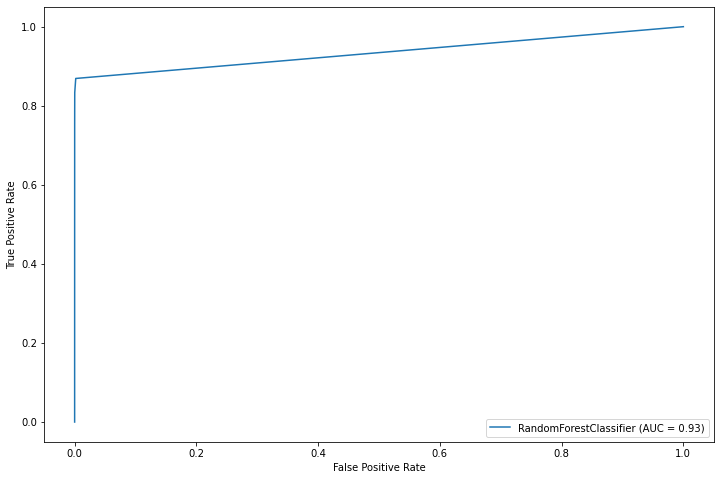

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
Acurácia:  0.9995435553526912
Precisão: 0.9393939393939394
Recal: 0.7380952380952381
F1: 0.8266666666666668


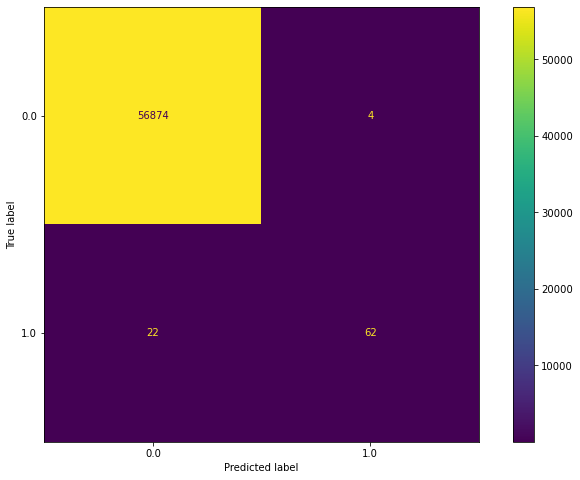

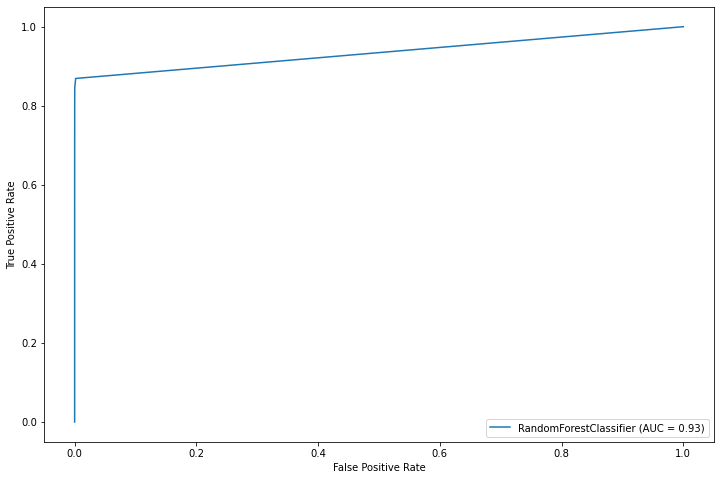

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
Acurácia:  0.9995962220427653
Precisão: 0.9420289855072463
Recal: 0.7738095238095238
F1: 0.8496732026143792


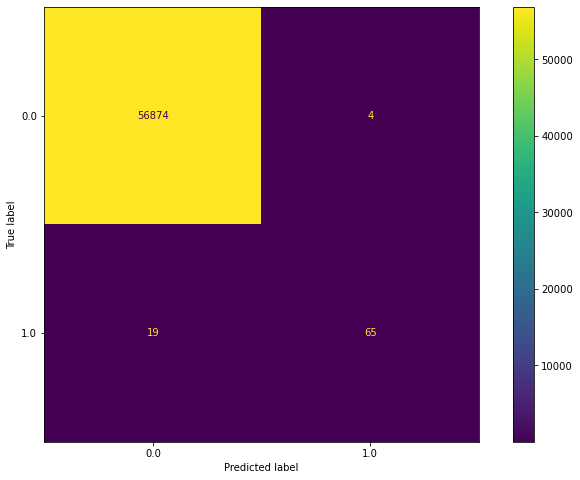

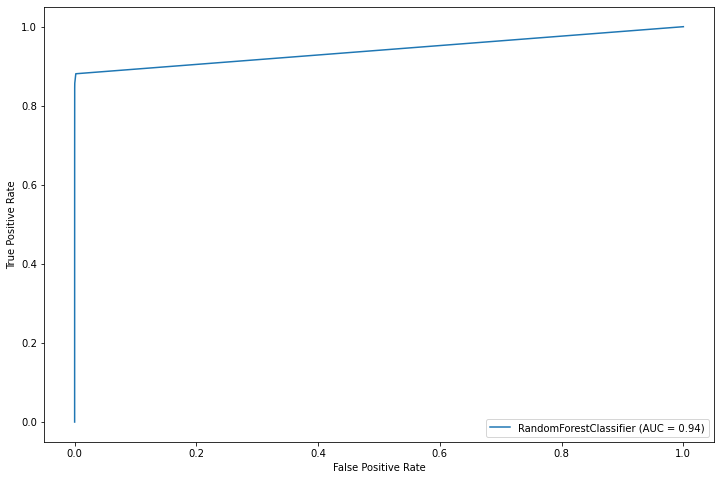

TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]
Acurácia:  0.9995435553526912
Precisão: 0.9264705882352942
Recal: 0.75
F1: 0.8289473684210527


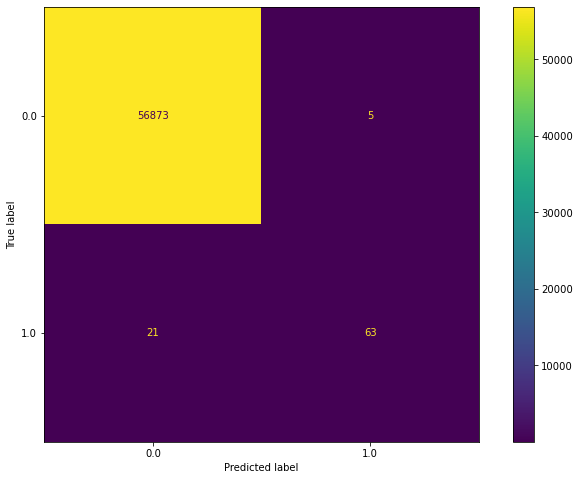

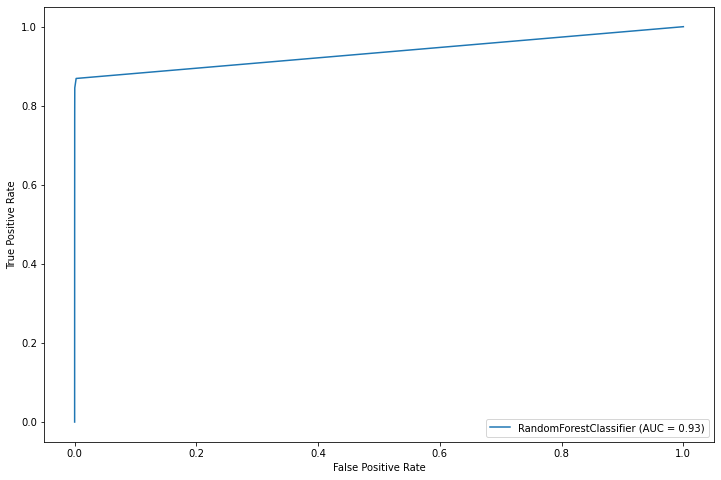

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics    

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(previsores, classes, test_size = p, random_state = 2)

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(previsores, classes):
    print("TRAIN:", train_index, "TEST:", test_index)
    model = RandomForestClassifier(n_estimators=6, bootstrap=True, class_weight='balanced', criterion='entropy')
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    print('Acurácia: ', model.score(x_test, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    precisao = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/precisao) + 1/(recall))
    print('Precisão:',precisao) 
    print('Recal:',recall) 
    print('F1:',f1)
    plot_confusion_matrix(model, x_test, y_test)  
    plt.show()  

    metrics.plot_roc_curve(model, x_test, y_test)  
    plt.show() 

# 2) Regressão Logística

TRAIN: [119781 120505 120837 ... 284804 284805 284806] TEST: [     0      1      2 ... 142425 142426 142427]
Acurácia:  0.9770197675643412
Precisão: 0.056480811006517015
Recal: 0.9285714285714286
F1: 0.10648464163822526


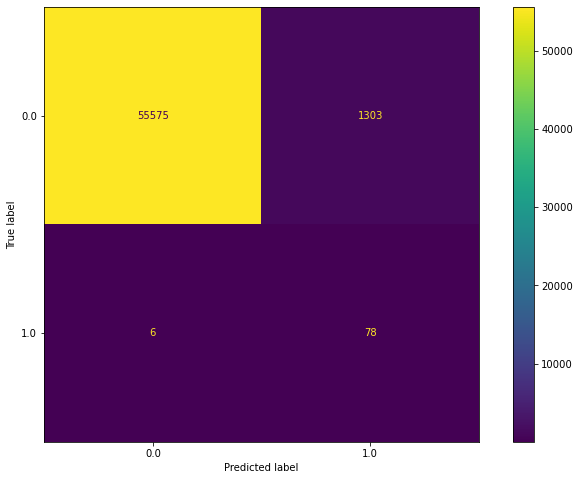

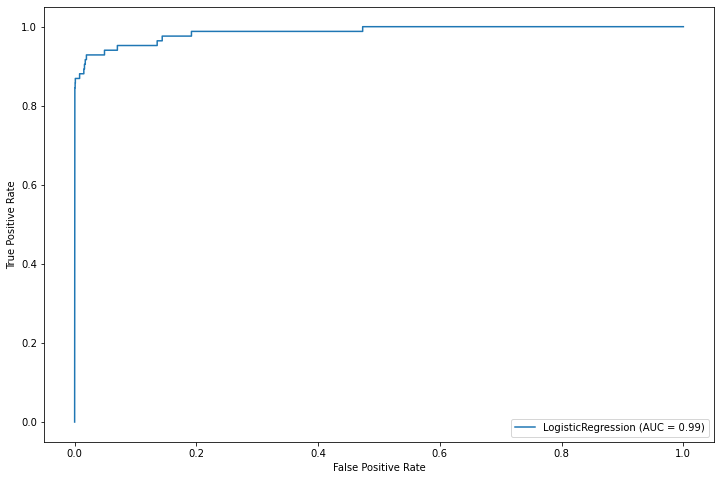

TRAIN: [     0      1      2 ... 142425 142426 142427] TEST: [119781 120505 120837 ... 284804 284805 284806]
Acurácia:  0.9770197675643412
Precisão: 0.056480811006517015
Recal: 0.9285714285714286
F1: 0.10648464163822526


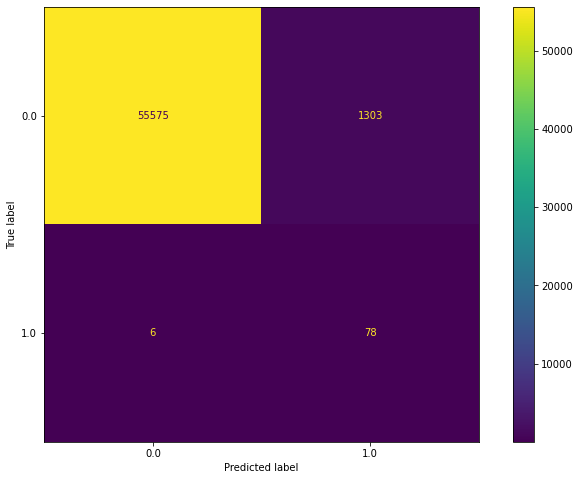

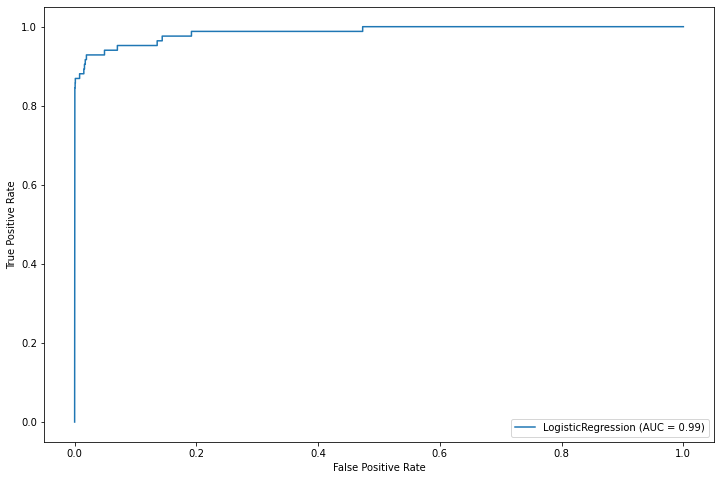

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(previsores, classes, test_size = p, random_state = 2)

y_pred_prob_list = []
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(previsores, classes):
    print("TRAIN:", train_index, "TEST:", test_index)
    model = LogisticRegression(solver = 'lbfgs', max_iter = 1000, class_weight='balanced')
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    print('Acurácia: ', model.score(x_test, y_test))
    y_pred_proba = model.predict_proba(x_test)
    y_pred_prob_list.append(y_pred_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    precisao = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/precisao) + 1/(recall))
    print('Precisão:',precisao) 
    print('Recal:',recall) 
    print('F1:',f1)
    
    plot_confusion_matrix(model, x_test, y_test)  
    plt.show()  

    metrics.plot_roc_curve(model, x_test, y_test)  
    plt.show() 

In [109]:
y_pred_prob_list

[array([[0.93316796, 0.06683204],
        [0.87518026, 0.12481974],
        [0.98551629, 0.01448371],
        ...,
        [0.96898521, 0.03101479],
        [0.74760632, 0.25239368],
        [0.48166134, 0.51833866]]),
 array([[0.93316796, 0.06683204],
        [0.87518026, 0.12481974],
        [0.98551629, 0.01448371],
        ...,
        [0.96898521, 0.03101479],
        [0.74760632, 0.25239368],
        [0.48166134, 0.51833866]])]

In [110]:
prob_fraude = []
for i in y_pred_prob_list:
    for j in i:
        prob_fraude.append(j[1])
        
prob_fraude = pd.Series(prob_fraude)
prob_fraude 

0         0.066832
1         0.124820
2         0.014484
3         0.113176
4         0.034229
            ...   
113919    0.042591
113920    0.046071
113921    0.031015
113922    0.252394
113923    0.518339
Length: 113924, dtype: float64

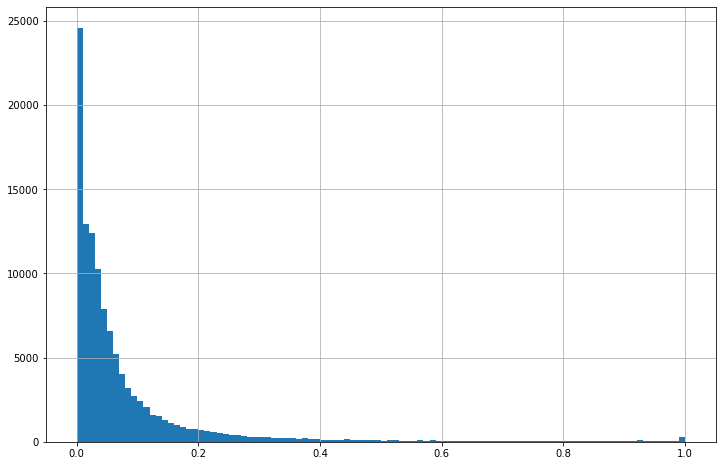

In [111]:
import scipy.stats as stats
from matplotlib import pyplot as plt

prob_fraude.hist(bins=100);
